In [1]:
import seaborn as sns

## - missing data 다루는 법
## - 열 뽑는 방식


In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
mpg.info()
#hrsepower에 6개가 미싱데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
mpg.head(10).describe()
#데이터가 일정하게 수집이 되는지 안되는지 체크해보는 것.
#mpg.tail(10).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.0
mean,15.600000,8.0,374.900000,178.300000,3879.700000,10.300000,70.0
std,1.577621,0.0,65.722396,35.543557,432.151735,1.337494,0.0
min,14.000000,8.0,302.000000,130.000000,3433.000000,8.500000,70.0
25%,14.250000,8.0,309.750000,150.000000,3462.750000,9.250000,70.0
50%,15.000000,8.0,370.000000,177.500000,3771.500000,10.250000,70.0
75%,16.750000,8.0,437.250000,210.750000,4333.750000,11.375000,70.0
max,18.000000,8.0,455.000000,225.000000,4425.000000,12.000000,70.0


In [7]:
!pip install missingno

In [8]:
import missingno as mino

In [9]:
dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'geoplot',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

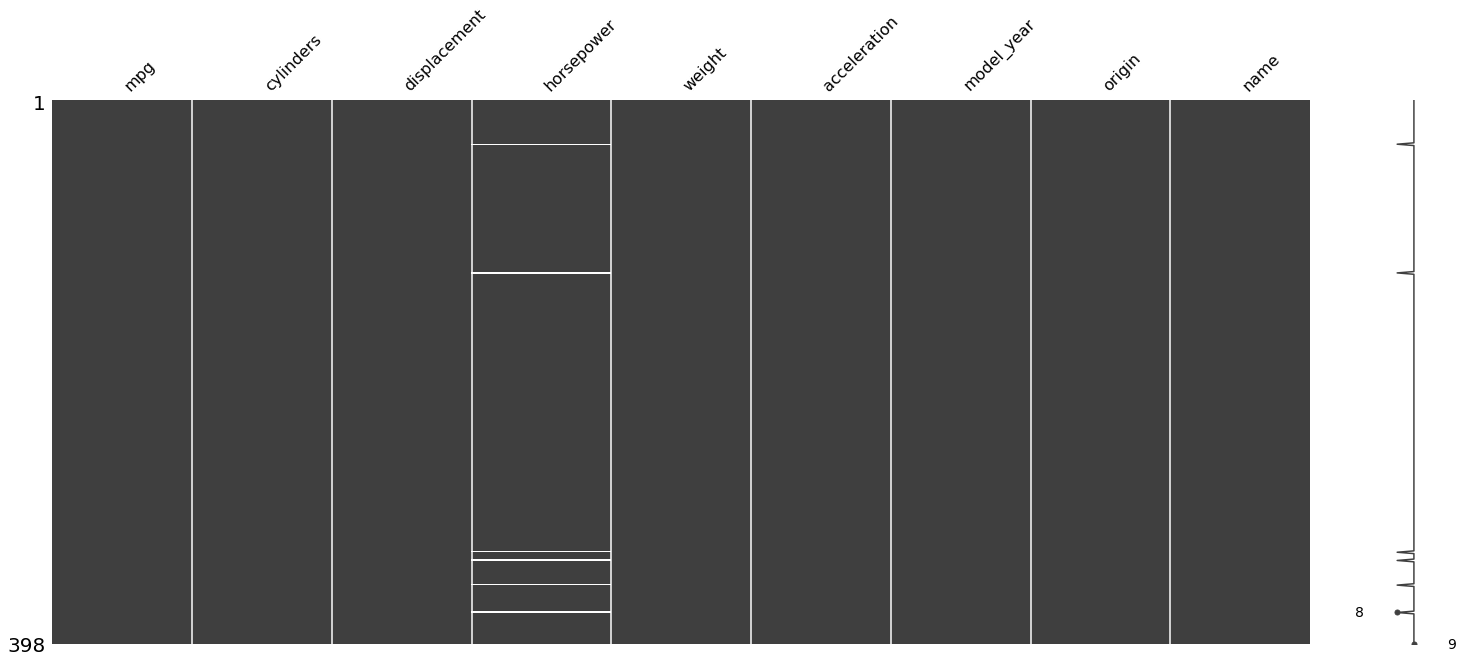

In [10]:
mino.matrix(mpg)
#미싱데이터 줄여섯개나옴

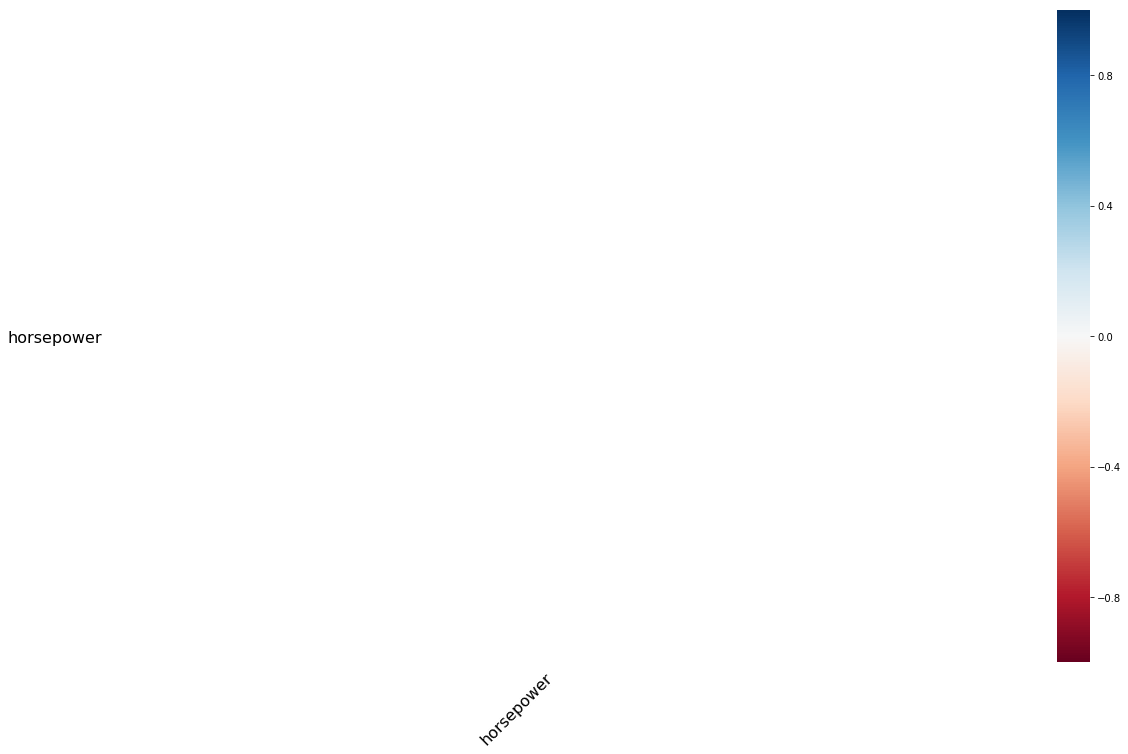

In [14]:
mino.heatmap(mpg)

In [19]:
mpg.horsepower.isna()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
368    False
369    False
370    False
371    False
372    False
373    False
374     True
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [20]:
mpg[mpg.horsepower.isna()]
#마스킹기법
#none값 있는애만 찾아낼 수 있다.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [22]:
mpg.horsepower.isna().sum()

6

In [23]:
import pandas as pd

In [24]:
pd.isna is pd.isnull

True

In [25]:
mpg[mpg.horsepower.isna()]
#na있으면 학습이안돼. 버려야돼

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [27]:
mpg[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [33]:
mpg.fillna(3).loc[32]
#na부분 특정값 채워넣자

mpg                     25
cylinders                4
displacement            98
horsepower               3
weight                2046
acceleration            19
model_year              71
origin                 usa
name            ford pinto
Name: 32, dtype: object

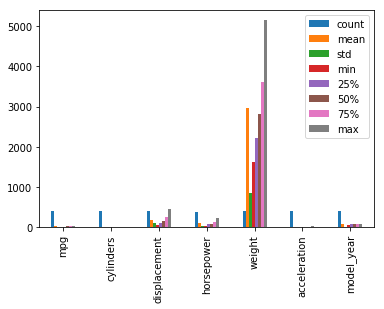

In [36]:
mpg.describe().T.plot.bar()


## 열 뽑는 방식 정리

1) key값으로 뽑기

2) attribute로 뽑기

3) fancy indexing

4) fancy indexing을 응용하여 columns 이용해서 쓰는 방법

5) filter 이용하기

6) select dtypes - (특정 데이터 타입 뽑고 싶을때)



In [37]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [41]:
mpg[mpg.columns[1:4]]

,cylinders,displacement,horsepower
0,8,307.0,130.0
1,8,350.0,165.0
2,8,318.0,150.0
3,8,304.0,150.0
4,8,302.0,140.0
5,8,429.0,198.0
6,8,454.0,220.0
7,8,440.0,215.0
8,8,455.0,225.0
9,8,390.0,190.0


In [42]:
mpg.filter(regex='[^weight]')
#regex (정규식)써서 weight 제외시키기
#즉, filter를 써서 내가 원하는 column만 뽑을 수 있다.

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,8.5,70,usa,amc ambassador dpl


In [43]:
mpg.select_dtypes('object')

,origin,name
0,usa,chevrolet chevelle malibu
1,usa,buick skylark 320
2,usa,plymouth satellite
3,usa,amc rebel sst
4,usa,ford torino
5,usa,ford galaxie 500
6,usa,chevrolet impala
7,usa,plymouth fury iii
8,usa,pontiac catalina
9,usa,amc ambassador dpl


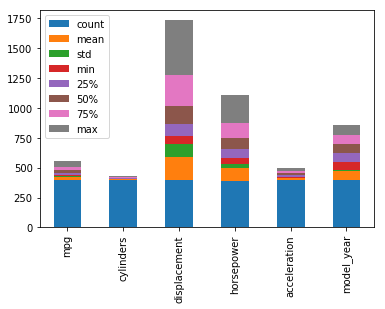

In [47]:
mpg.filter(regex='[^weight]').describe().T.plot.bar(stacked=True)
#index가 x축이다. 
#쌓여서 나온다

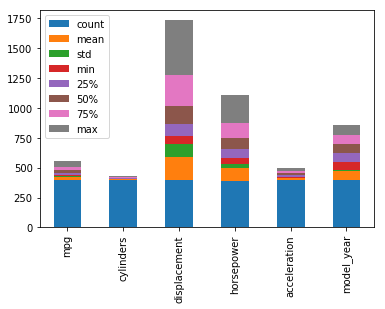

In [48]:
mpg.filter(regex='[^weight]').describe().T.plot.bar(stacked=True);
#세미콜론 붙이면 위에 글씨없어짐

/Users/jung-yeongseo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jung-yeongseo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


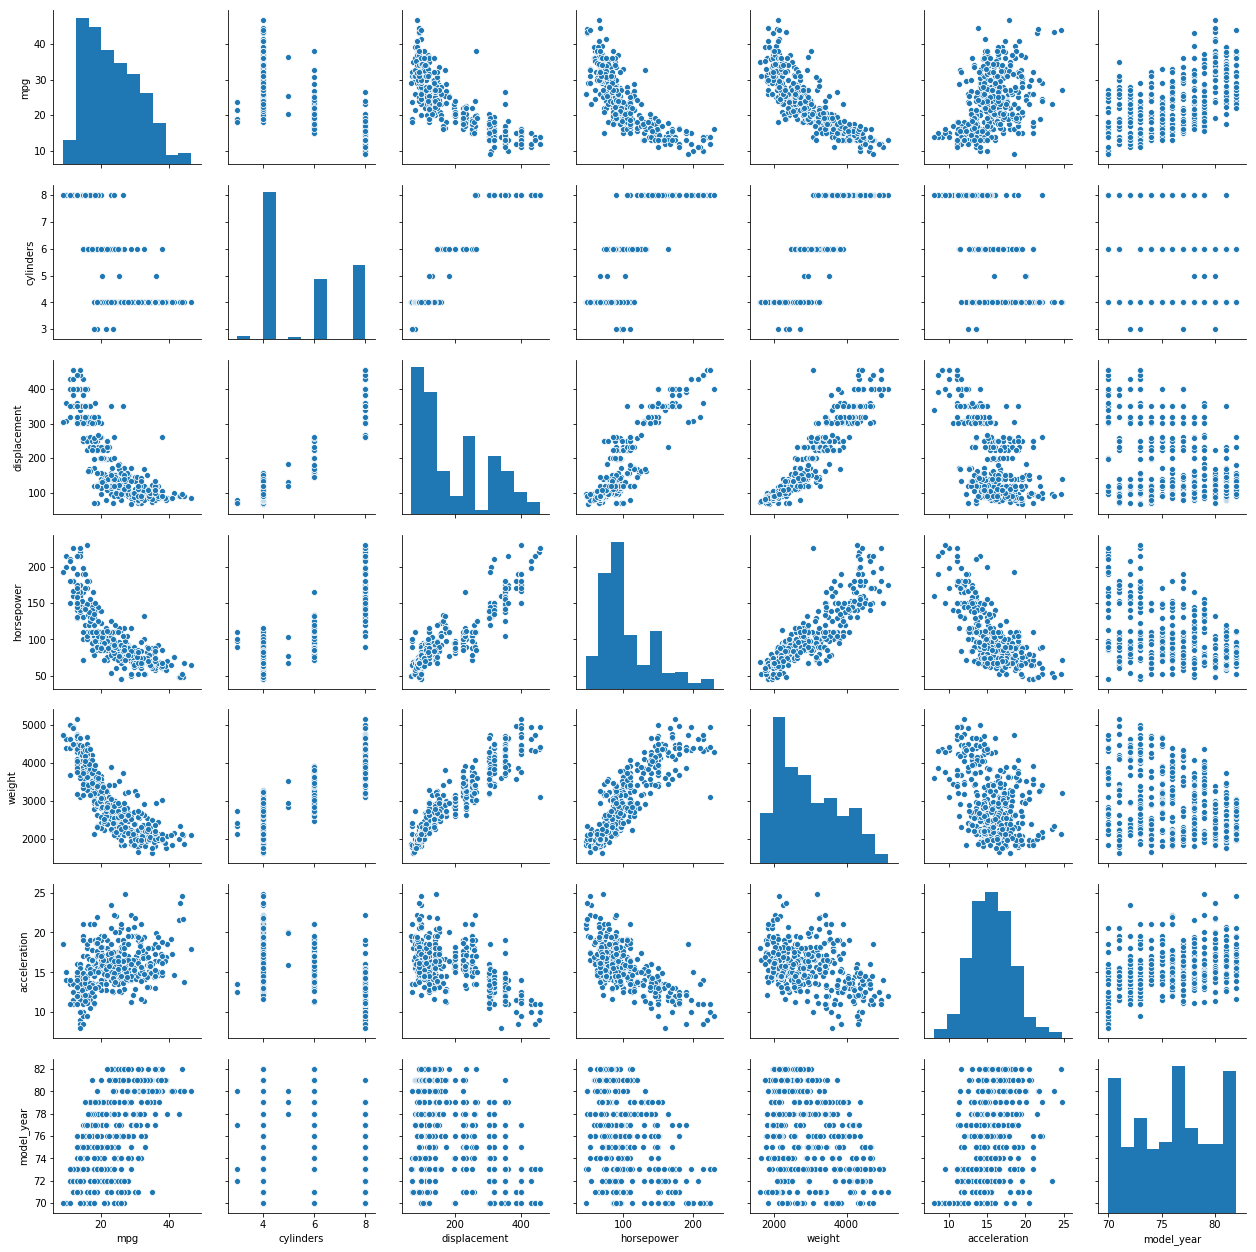

In [49]:
sns.pairplot(mpg)

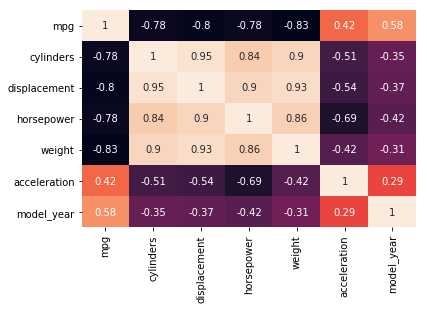

In [51]:
#classification 가능한 데이터들만 색깔로 나옴.
#근데 이것도 상관관계 분석하고싶다 ! 하면 이거써

sns.heatmap(mpg.corr(), annot=True, cbar=False);

In [ ]:
mpg.describe([])